In [1]:
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name =='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [2]:
s_x = np.linspace(-5,100,1000)
s_df = pd.DataFrame(s_x)

In [3]:
s_df.head()

,0
0,-5.000000
1,-4.894895
2,-4.789790
3,-4.684685
4,-4.579580


In [4]:
s_df_sqz = s_df.squeeze('columns')

In [7]:
sample_data = pd.DataFrame({
    'dist':s_df_sqz.sample(1000),
    'type':'Data',
})
sample_mean_05 = pd.DataFrame({
    'dist':[s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type': '5개 샘플 평균'
})
sample_mean_10 = pd.DataFrame({
    'dist':[s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type': '10개 샘플 평균'
})
sample_mean_20 = pd.DataFrame({
    'dist':[s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type': '20개 샘플 평균'
})
sample_mean_30 = pd.DataFrame({
    'dist':[s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type': '30개 샘플 평균'
})

results= pd.concat([sample_data,sample_mean_05,sample_mean_10,sample_mean_20,sample_mean_30])

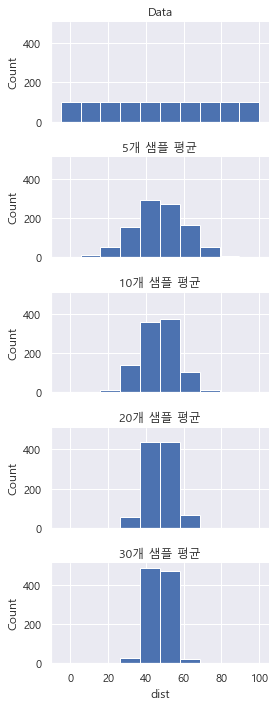

In [10]:
g = sns.FacetGrid(results,col='type',col_wrap=1, height=2,aspect=2)
g.map(plt.hist,'dist',range=[-5,100],bins=10)
g.set_axis_labels('dist','Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [11]:
norm = stats.norm(loc=50,scale=10)

s_x=np.linspace(-10,120,2000)

s_pdf=norm.pdf(s_x)

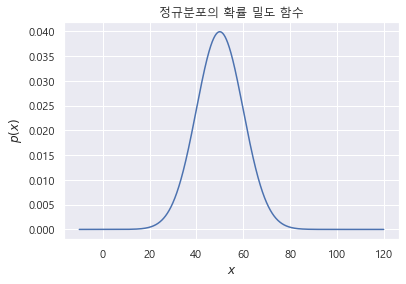

In [12]:
plt.plot(s_x,s_pdf)
plt.title("정규분포의 확률 밀도 함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [14]:
bag_of_mean=[]
for i in range(10):
    m = np.random.binomial(n=1,p=0.5,size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

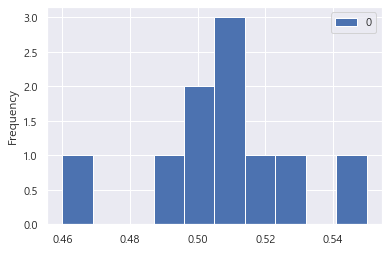

In [15]:
pd.DataFrame(bag_of_mean).plot.hist()

In [16]:
bag_of_mean = []

for i in range(500):
    m = np.random.binomial(n=1,p=0.5,size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

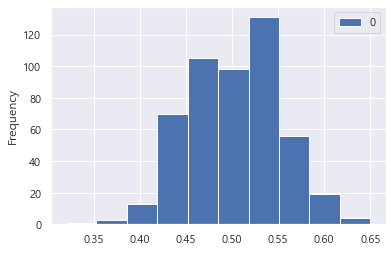

In [17]:
pd.DataFrame(bag_of_mean).plot.hist()

In [18]:
bag_of_mean = []
for i in range(1000):
    m = np.random.binomial(n=1,p=0.5,size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

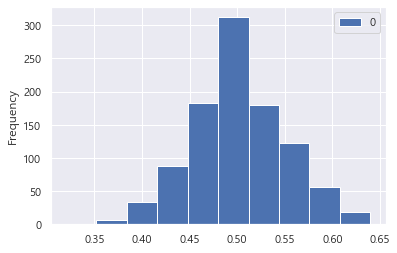

In [20]:
pd.DataFrame(bag_of_mean).plot.hist()

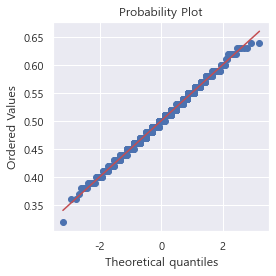

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(bag_of_mean,plot=ax)

plt.tight_layout()
plt.show()

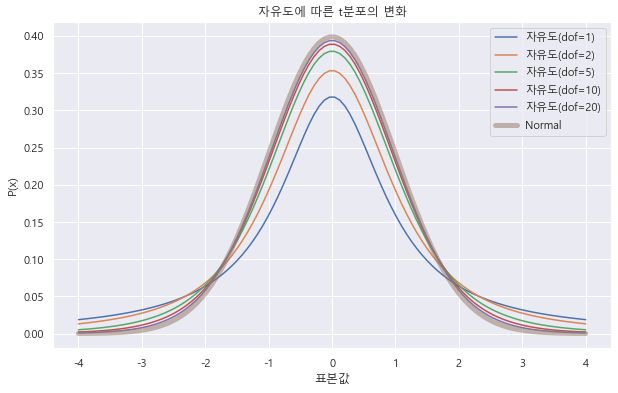

In [23]:
t_data = np.linspace(-4,4,100)

plt.figure(figsize=(10,6))
for dof in [1,2,5,10,20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data,t_dist.pdf(t_data),label=("자유도(dof=%d)" % dof))
plt.plot(t_data,stats.norm().pdf(t_data),label="Normal",lw=5,alpha=0.5)
plt.title("자유도에 따른 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.legend()
plt.show()

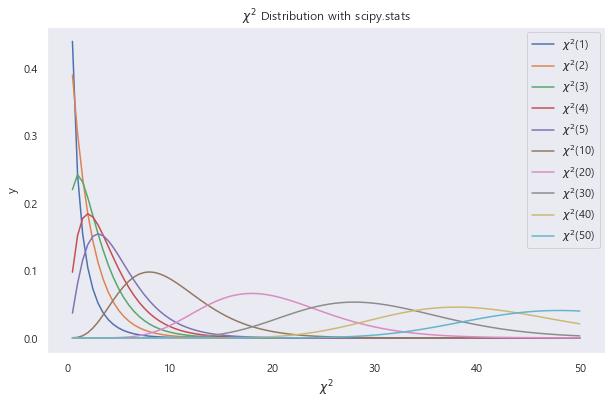

In [27]:
from scipy.stats import chi2

Chi_X=np.linspace(0.5,50,100)
plt.figure(figsize=(10,6))

for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X,stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$('+str(dof)+')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [28]:
f_data = np.linspace(0.05,3,1000)

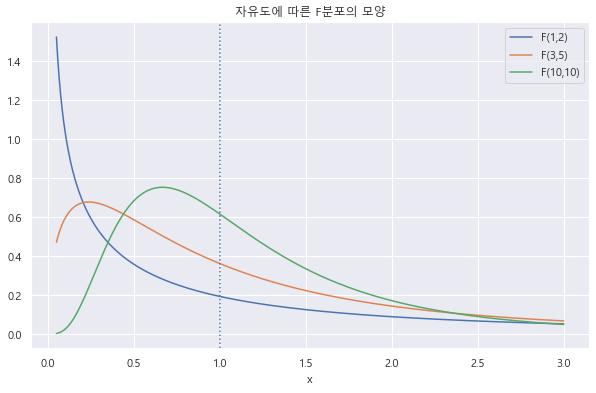

In [29]:
plt.figure(figsize=(10,6))
plt.plot(f_data, stats.f(1,2).pdf(f_data),ls="-",label="F(1,2)")
plt.plot(f_data, stats.f(3,5).pdf(f_data),ls="-",label="F(3,5)")
plt.plot(f_data, stats.f(10,10).pdf(f_data),ls="-",label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel('x')
plt.title('자유도에 따른 F분포의 모양')
plt.legend()
plt.show()